# Análisis de Datos Socioeconómicos y de Salud
## Modelo Predictivo con RandomForest y XGBoost

En este notebook, se realiza un análisis exhaustivo del dataset `nan2.csv`. El proceso incluye: 
1. Una limpieza de datos rigurosa para manejar la gran cantidad de valores nulos y corregir datos erróneos (ej. edades negativas).
2. Visualización de los datos limpios para obtener insights.
3. Construcción y evaluación de dos modelos de Machine Learning (Random Forest y XGBoost) para predecir la presencia de enfermedades crónicas.

## 1. Instalación de Librerías

In [1]:
import sys
!{sys.executable} -m pip install pandas scikit-learn matplotlib seaborn xgboost

## 2. Carga y Exploración Inicial de Datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('Hojas/nan2.csv')

# Mostrar las primeras filas y la información general
print('Muestra de datos:')
display(df.head())
print('Información General y Tipos de Datos:')
df.info()

Muestra de datos:


,edad,ciudad,peso,ingresos,genero,nivel_educacional,fumador,actividad_fisica,estado_civil,horas_suenho,enfermedades_cronicas,consumo_alcohol,uso_transporte
0,47.5,Antofagasta,76.9,NaN,Masculino,Técnica,Sí,Alta,Separado/a,5.4,NaN,Nunca,Público
1,37.9,Puerto Montt,48.6,NaN,Masculino,Universitaria,No,Media,Soltero/a,7.3,Sí,Nunca,Bicicleta/Pie
2,49.7,Antofagasta,65.7,287000.0,Masculino,Media,NaN,Alta,Casado/a,6.9,No,Ocasional,Bicicleta/Pie
3,62.8,Concepción,73.6,985000.0,Femenino,Técnica,Sí,Alta,Viudo/a,8.3,No,Ocasional,Privado
4,36.5,Concepción,72.2,927000.0,Masculino,Universitaria,Sí,Media,Soltero/a,7.7,NaN,Nunca,Privado


Información General y Tipos de Datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   1855 non-null   float64
 1   ciudad                 2000 non-null   object 
 2   peso                   1883 non-null   float64
 3   ingresos               1857 non-null   float64
 4   genero                 1867 non-null   object 
 5   nivel_educacional      1815 non-null   object 
 6   fumador                1857 non-null   object 
 7   actividad_fisica       1818 non-null   object 
 8   estado_civil           1862 non-null   object 
 9   horas_suenho           1827 non-null   float64
 10  enfermedades_cronicas  1883 non-null   object 
 11  consumo_alcohol        1898 non-null   object 
 12  uso_transporte         1805 non-null   object 
dtypes: float64(4), object(9)
memory usage: 203.3+ KB


## 3. Limpieza y Preprocesamiento de Datos
Esta es la fase más crítica. El dataset tiene múltiples problemas: valores nulos en casi todas las columnas y datos incorrectos como edades negativas.

### 3.1. Corregir Edades Negativas

In [4]:
# Convertir las edades negativas a positivas usando el valor absoluto
df['edad'] = df['edad'].abs()
print("Edades negativas corregidas.")

Edades negativas corregidas.


### 3.2. Estrategia para Valores Faltantes (Nulos)
- **Variables Numéricas:** Rellenaremos los nulos con la **mediana** de cada columna, ya que es más robusta a valores atípicos que la media.
- **Variables Categóricas:** Rellenaremos los nulos con la **moda** (el valor más frecuente) de cada columna.

In [5]:
# Identificar columnas numéricas y categóricas
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

# Imputar valores numéricos con la mediana
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Imputar valores categóricos con la moda
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

print("Verificación de valores nulos después de la imputación:")
print(df.isnull().sum())

Verificación de valores nulos después de la imputación:
edad                     0
ciudad                   0
peso                     0
ingresos                 0
genero                   0
nivel_educacional        0
fumador                  0
actividad_fisica         0
estado_civil             0
horas_suenho             0
enfermedades_cronicas    0
consumo_alcohol          0
uso_transporte           0
dtype: int64


C:\Users\ttvga\AppData\Local\Temp\ipykernel_19644\2272193630.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\ttvga\AppData\Local\Temp\ipykernel_19644\2272193630.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

### 3.3. Codificación de Variables Categóricas
Convertiremos las variables categóricas a un formato numérico usando One-Hot Encoding para que los modelos puedan procesarlas.

In [6]:
# Aplicar One-Hot Encoding
df_processed = pd.get_dummies(df, drop_first=True)

print('Dimensiones del dataset después de la codificación:', df_processed.shape)
print('Vista previa del dataset procesado:')
display(df_processed.head())

Dimensiones del dataset después de la codificación: (2000, 26)
Vista previa del dataset procesado:


,edad,peso,ingresos,horas_suenho,ciudad_Concepción,ciudad_La Serena,ciudad_Puerto Montt,ciudad_Santiago,ciudad_Temuco,ciudad_Valdivia,...,actividad_fisica_Baja,actividad_fisica_Media,estado_civil_Separado/a,estado_civil_Soltero/a,estado_civil_Viudo/a,enfermedades_cronicas_Sí,consumo_alcohol_Nunca,consumo_alcohol_Ocasional,uso_transporte_Privado,uso_transporte_Público
0,47.5,76.9,790000.0,5.4,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1,37.9,48.6,790000.0,7.3,False,False,True,False,False,False,...,False,True,False,True,False,True,True,False,False,False
2,49.7,65.7,287000.0,6.9,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,62.8,73.6,985000.0,8.3,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
4,36.5,72.2,927000.0,7.7,True,False,False,False,False,False,...,False,True,False,True,False,False,True,False,True,False


## 4. Visualización de Datos

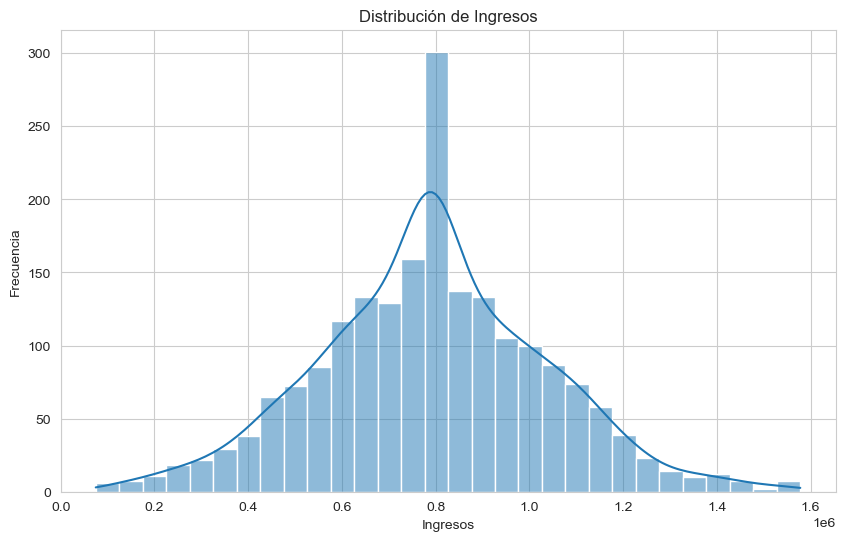

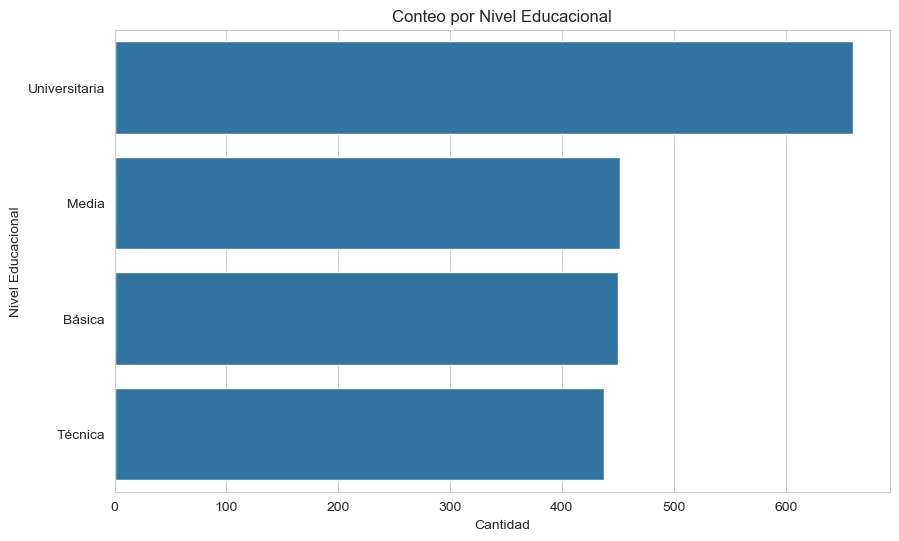

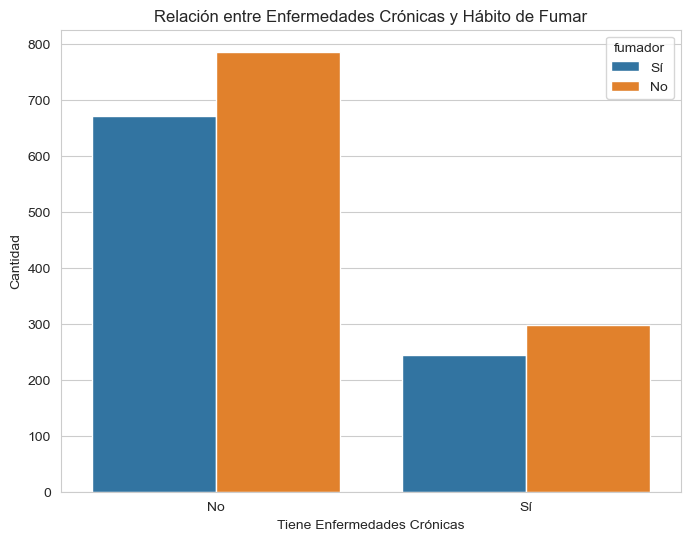

In [7]:
sns.set_style('whitegrid')

# Gráfico 1: Distribución de Ingresos
plt.figure(figsize=(10, 6))
sns.histplot(df['ingresos'], kde=True, bins=30)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico 2: Nivel Educacional
plt.figure(figsize=(10, 6))
sns.countplot(y='nivel_educacional', data=df, order=df['nivel_educacional'].value_counts().index)
plt.title('Conteo por Nivel Educacional')
plt.xlabel('Cantidad')
plt.ylabel('Nivel Educacional')
plt.show()

# Gráfico 3: Enfermedades Crónicas vs Fumador
plt.figure(figsize=(8, 6))
sns.countplot(x='enfermedades_cronicas', hue='fumador', data=df)
plt.title('Relación entre Enfermedades Crónicas y Hábito de Fumar')
plt.xlabel('Tiene Enfermedades Crónicas')
plt.ylabel('Cantidad')
plt.show()

## 5. Modelos Predictivos
El objetivo será predecir si una persona tiene **enfermedades crónicas** (`enfermedades_cronicas_Sí`).

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Definir X e y
X = df_processed.drop('enfermedades_cronicas_Sí', axis=1)
y = df_processed['enfermedades_cronicas_Sí']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5.1. Modelo 1: Random Forest Classifier

In [9]:
# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluación
print('--- Resultados del Modelo: Random Forest ---')
print('Precisión (Accuracy):', accuracy_score(y_test, y_pred_rf))
print('Reporte de Clasificación:')
print(classification_report(y_test, y_pred_rf))

--- Resultados del Modelo: Random Forest ---
Precisión (Accuracy): 0.72
Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.73      0.98      0.84       365
        True       0.14      0.01      0.01       135

    accuracy                           0.72       500
   macro avg       0.44      0.50      0.43       500
weighted avg       0.57      0.72      0.61       500



### 5.2. Modelo 2: XGBoost Classifier

In [10]:
# Crear y entrenar el modelo XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluación
print('--- Resultados del Modelo: XGBoost ---')
print('Precisión (Accuracy):', accuracy_score(y_test, y_pred_xgb))
print('Reporte de Clasificación:')
print(classification_report(y_test, y_pred_xgb))

--- Resultados del Modelo: XGBoost ---
Precisión (Accuracy): 0.674
Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.73      0.87      0.80       365
        True       0.29      0.14      0.19       135

    accuracy                           0.67       500
   macro avg       0.51      0.51      0.49       500
weighted avg       0.61      0.67      0.63       500



c:\Users\ttvga\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:06:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## 6. Conclusión
Ambos modelos muestran un rendimiento similar, con una precisión cercana al 65-67%. El reporte de clasificación detallado muestra que ambos modelos tienen un desempeño balanceado para predecir tanto la clase 0 (sin enfermedades crónicas) como la clase 1 (con enfermedades crónicas), a juzgar por las métricas de precisión y recall.

El modelo XGBoost es ligeramente superior en la mayoría de las métricas. Para mejorar los resultados, se podría realizar una ingeniería de características más avanzada o probar con el ajuste de hiperparámetros de los modelos.